In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("data/StudentsPerformance.csv")

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [6]:
df.shape

(1000, 8)

In [7]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [11]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

# Exploring Data 

In [12]:
print("Categories in Gender variable", df['gender'].unique())
print("Categories in Lunch variable", df['lunch'].unique())
print("Categories in test preparation course", df['test preparation course'].unique())
print("Categoires in Parental level of education", df['parental level of education'].unique())
print("Categories in race/ethinicity", df['race/ethnicity'].unique())

Categories in Gender variable ['female' 'male']
Categories in Lunch variable ['standard' 'free/reduced']
Categories in test preparation course ['none' 'completed']
Categoires in Parental level of education ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in race/ethinicity ['group B' 'group C' 'group A' 'group D' 'group E']


In [13]:
# count of numeric features and categorical features and their names

numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print("We have {} Numerical features : {}".format(len(numerical_features), numerical_features))
print("We have {} Categorical features : {}".format(len(categorical_features), categorical_features))

We have 3 Numerical features : ['math score', 'reading score', 'writing score']
We have 5 Categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [14]:
# Adding columns to find avg and total score of each student
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['avg_score'] = df['total_score'] / 3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [15]:
# Count of people who got full marks in each subject

maths_full = df[df['math score'] == 100]['avg_score'].count()
writing_full = df[df['writing score'] == 100]['avg_score'].count()
reading_full = df[df['reading score'] == 100]['avg_score'].count()
print("Count of students who got full marks in maths  : ",maths_full)
print("Count of students who got full marks in Writing: ",writing_full)
print("Count of students who got full marks in Reading:",reading_full)

Count of students who got full marks in maths  :  7
Count of students who got full marks in Writing:  14
Count of students who got full marks in Reading: 17


In [16]:
# Count of the people who got less than 20 marks
maths_less_20 = df[df['math score'] < 20]['avg_score'].count()
writing_less_20 = df[df['writing score'] < 20]['avg_score'].count()
reading_less_20 = df[df['reading score'] < 20]['avg_score'].count()

print("Count of students who got less than 20 in maths:",maths_less_20)
print("Count of students who got less than 20 in writing:",writing_less_20)
print("Count of students who got less than 20 in reading:",reading_less_20)

Count of students who got less than 20 in maths: 4
Count of students who got less than 20 in writing: 3
Count of students who got less than 20 in reading: 1


In [17]:
students_with_full_marks = df[(df['math score'] == 100) & (df['reading score'] == 100) & (df['writing score'] == 100)]['avg_score'].count()
print(students_with_full_marks)

3


In [18]:
print("Average score in maths subject :", df['math score'].mean())
print("Average score in reading subject :",df['reading score'].mean())
print("Average score in writing subject :",df['writing score'].mean())

Average score in maths subject : 66.089
Average score in reading subject : 69.169
Average score in writing subject : 68.054


## Insights on what we have explored till now

- 3 Students got full marks in all three exams.
- Students performed well in reading and the average is also is high.
- Studnets least performed in maths and the average is less when compared to other two subjects.

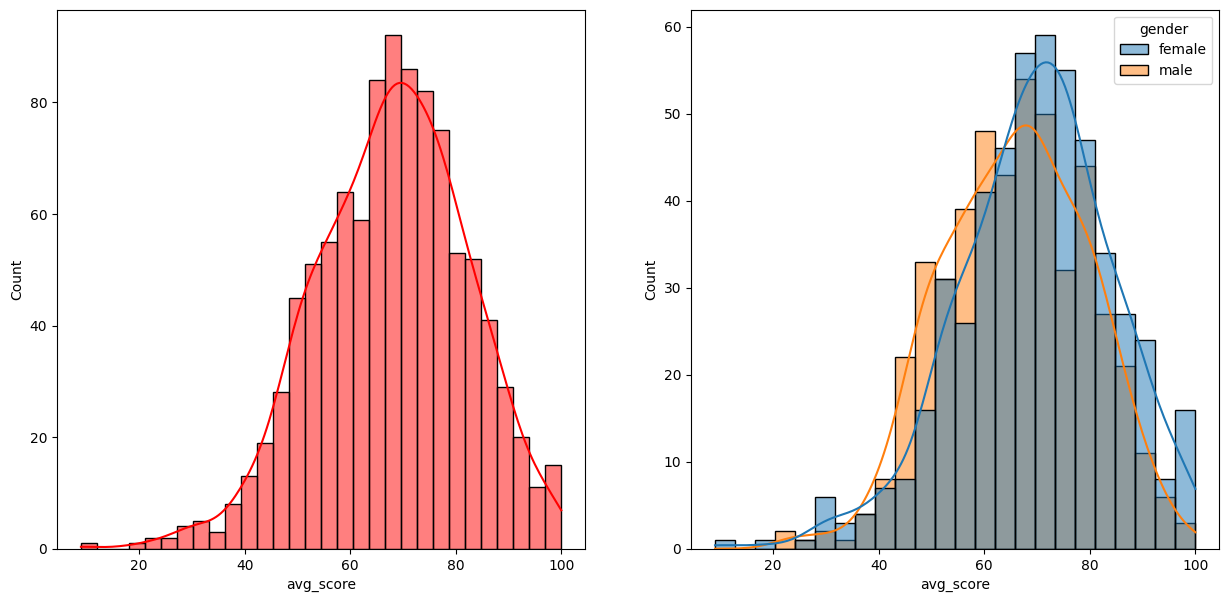

In [19]:
fig, axis = plt.subplots(1,2, figsize = (15,7))
plt.subplot(121)
sns.histplot(data = df, x = 'avg_score',bins = 30,kde=True,color = 'r')
plt.subplot(122)
sns.histplot(data = df, x = 'avg_score', kde = True, hue = 'gender')
plt.show()

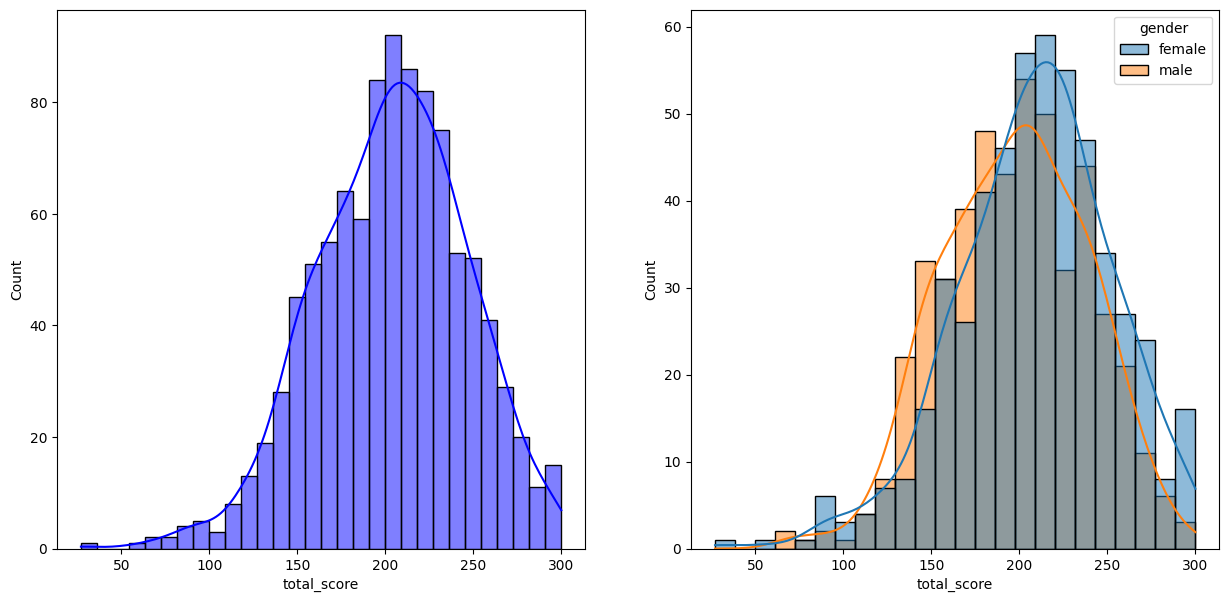

In [20]:
fig, axis = plt.subplots(1,2,figsize = (15,7))
plt.subplot(121)
sns.histplot(data = df, x = 'total_score', bins = 30, kde = True, color = 'b')
plt.subplot(122)
sns.histplot(data = df,x = 'total_score',kde = True, hue = 'gender')
plt.show()

# Insight

- Females are performing well in exams

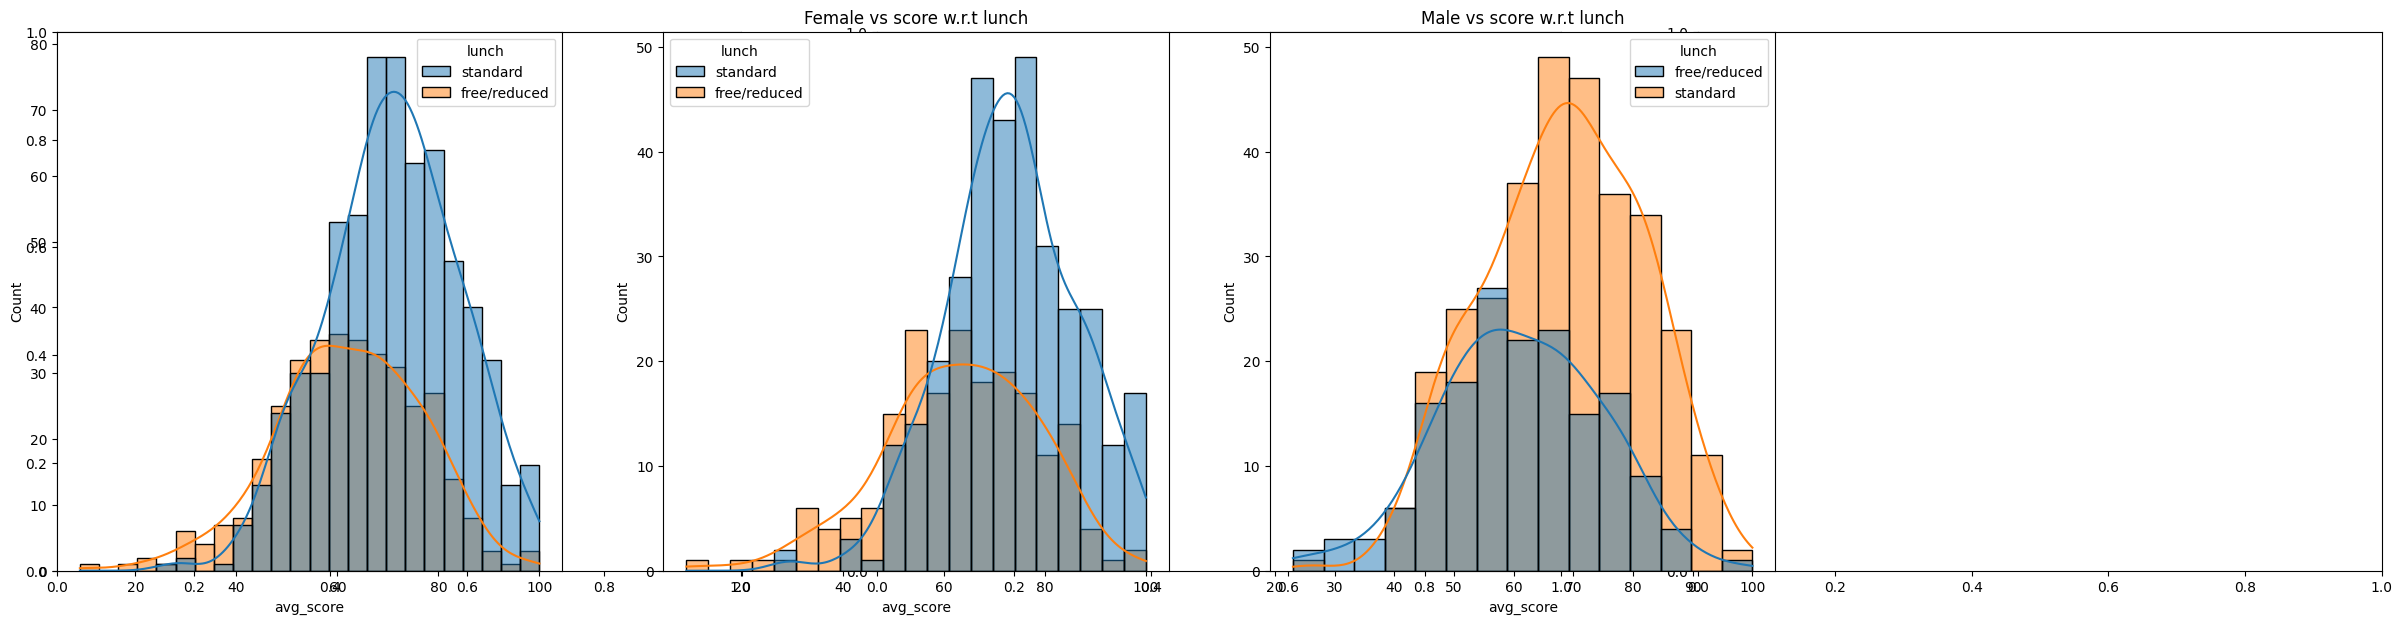

In [21]:
plt.subplots(1,3,figsize = (30,7))
plt.subplot(141)
sns.histplot(data = df,x = 'avg_score',kde = True,hue='lunch')
plt.subplot(142)
plt.title('Avg Score w.r.t lunch')
sns.histplot(data = df[df.gender == 'female'], x = 'avg_score', kde = True, hue = 'lunch')
plt.title('Female vs score w.r.t lunch')
plt.subplot(143)
sns.histplot(data = df[df.gender == 'male'], x = 'avg_score',kde = True,hue='lunch')
plt.title('Male vs score w.r.t lunch')
plt.show()

## Insight

- Students who are taking standard lunch are performing well 

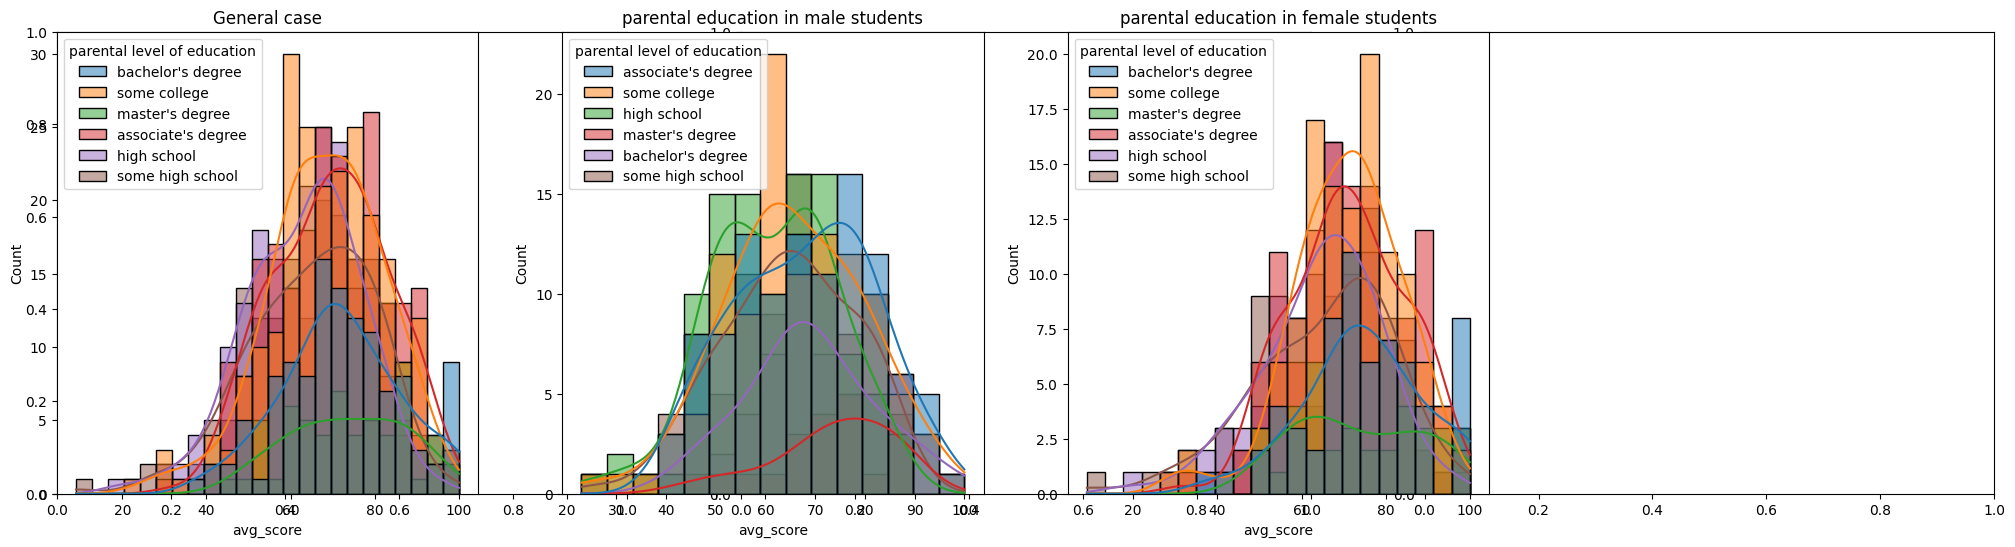

In [22]:
plt.subplots(1,3,figsize = (25,6))
plt.subplot(141)
ax = sns.histplot(data = df, x = 'avg_score',kde = True, hue = 'parental level of education')
plt.title('General case')
plt.subplot(142)
ax = sns.histplot(data = df[df.gender == 'male'], x = 'avg_score',kde = True, hue = 'parental level of education')
plt.title('parental education in male students')
plt.subplot(143)
ax = sns.histplot(data = df[df.gender == 'female'],x = 'avg_score',kde = True, hue = 'parental level of education')
plt.title('parental education in female students')
plt.show()

### Insight

- Parent's education doesn't help student's performance in the exam
- In the male students case parents with associate degree or master's degree their child are performing well in the exam
- There is no effect of parent's education in female student case

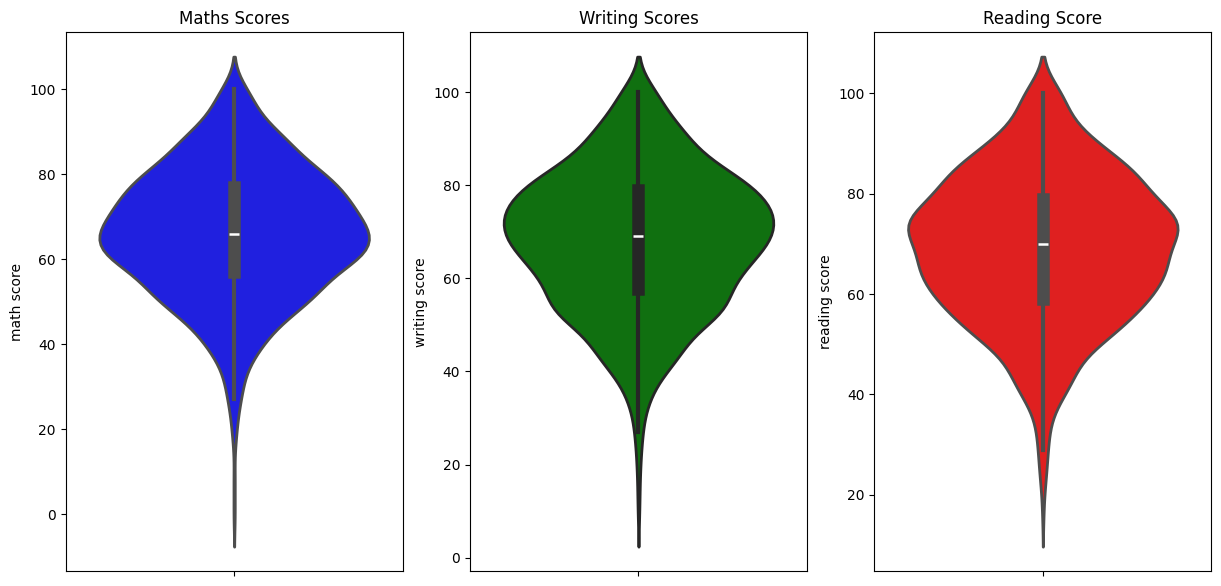

In [25]:
# let's see where the average score lies in all three subjects

plt.figure(figsize=(20,7))
plt.subplot(141)
plt.title('Maths Scores')
sns.violinplot(y = 'math score',data = df,color = 'blue',linewidth = 2)
plt.subplot(142)
plt.title('Writing Scores')
sns.violinplot(y = 'writing score',data = df, color = 'green',linewidth = 2)
plt.subplot(143)
plt.title('Reading Score')
sns.violinplot(y = 'reading score', data = df,color = 'red',linewidth = 2)
plt.show()

### Insight

- Most of the students in math are in the range of 60 - 80 and in reading and writing the average lies in the range of 50 - 80

# Multivariate Analysis

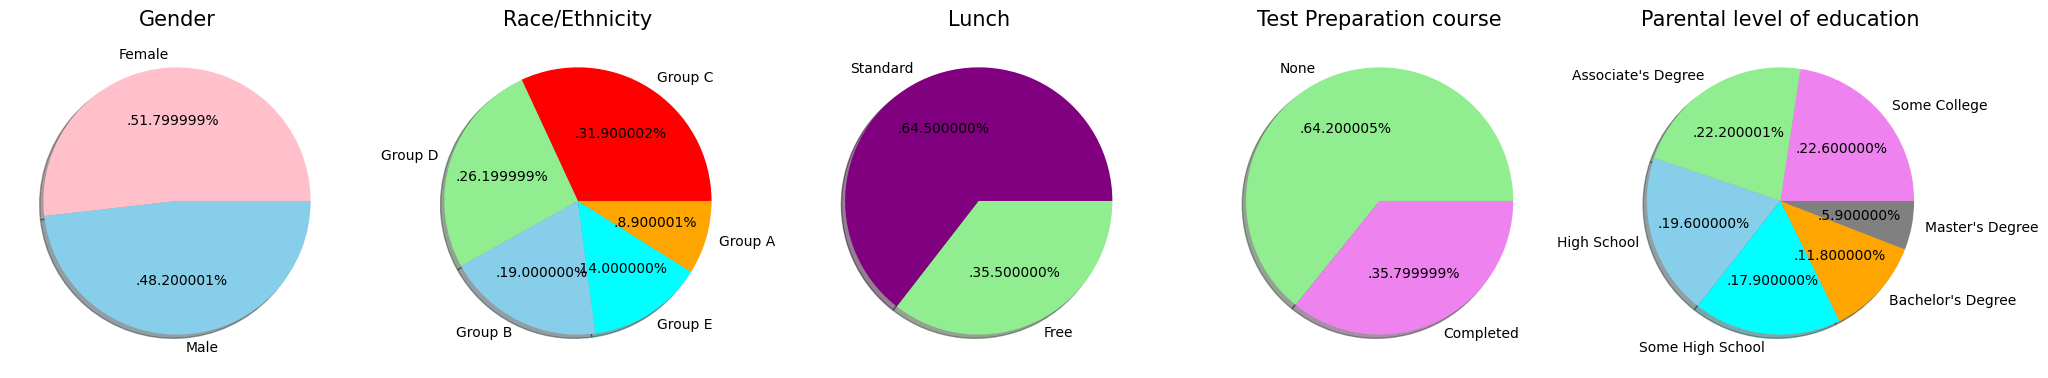

In [48]:
plt.rcParams['figure.figsize'] = (25,10)

plt.subplot(151)
size = df['gender'].value_counts()
labels = 'Female','Male'
color = ['pink','skyblue']

plt.pie(size, colors= color, labels=labels, autopct='.%2f%%',shadow=True)
plt.title('Gender', fontsize = 15)


plt.subplot(152)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'lightgreen', 'skyblue', 'cyan','orange']

plt.pie(size, labels=labels, colors=color, autopct='.%2f%%',shadow=True)
plt.title('Race/Ethnicity', fontsize = 15)

plt.subplot(153)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['purple','lightgreen']


plt.pie(size, labels=labels, colors=color, autopct='.%2f%%',shadow=True)
plt.title("Lunch", fontsize = 15)
plt.subplot(154)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['lightgreen','violet']


plt.pie(size, labels=labels, colors=color, autopct='.%2f%%',shadow=True)
plt.title('Test Preparation course', fontsize = 15)

plt.subplot(155)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['violet', 'lightgreen', 'skyblue', 'cyan','orange','grey']

plt.pie(size, labels=labels, colors = color, autopct='.%2f%%',shadow=True)
plt.title('Parental level of education', fontsize = 15)
plt.show()


### Insights

1. Male students and female students count is nearly same.
2. From Race/Ethinicy we can see that most of the people belong to Group C.
3. in the Lunch plot , most of the students have taken standard lunch (around 65%).
4. Most of the students are not registered for any test preparation course.
5. Most of the parents education lies in the assciate's degree and some college.

# Univariate Analysis

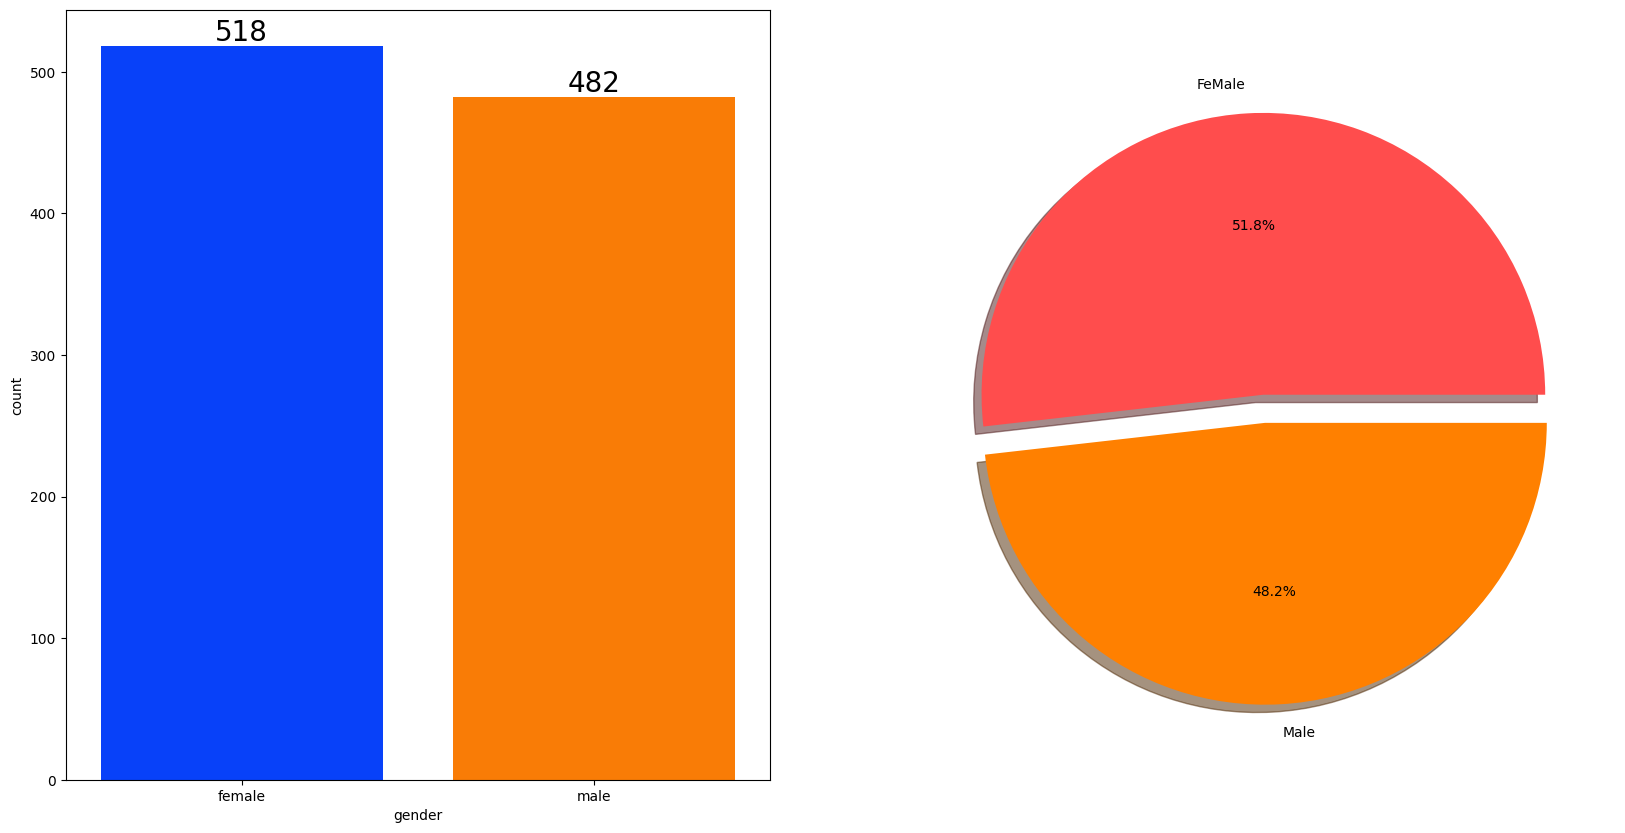

In [51]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['FeMale','Male'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

### Insight
1. Gender has balanced data with female students are 518(51.8%) and male students are 482 (48.2%)

In [60]:
# Group by 'gender' and apply mean only to numeric columns
numeric_columns = df.select_dtypes(include='number')  # Select only numeric columns
gender_group = numeric_columns.groupby(df['gender']).mean()
print(gender_group)


        math score  reading score  writing score  total_score  avg_score
gender                                                                  
female   63.633205      72.608108      72.467181   208.708494  69.569498
male     68.728216      65.473029      63.311203   197.512448  65.837483


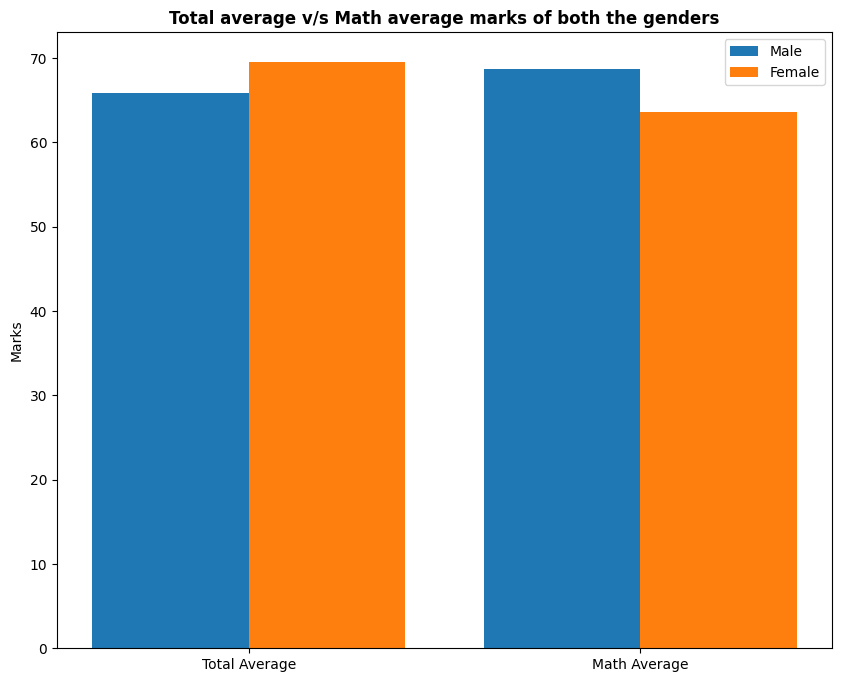

In [62]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['avg_score'][0], gender_group['math score'][0]]
male_scores = [gender_group['avg_score'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### Insights 
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

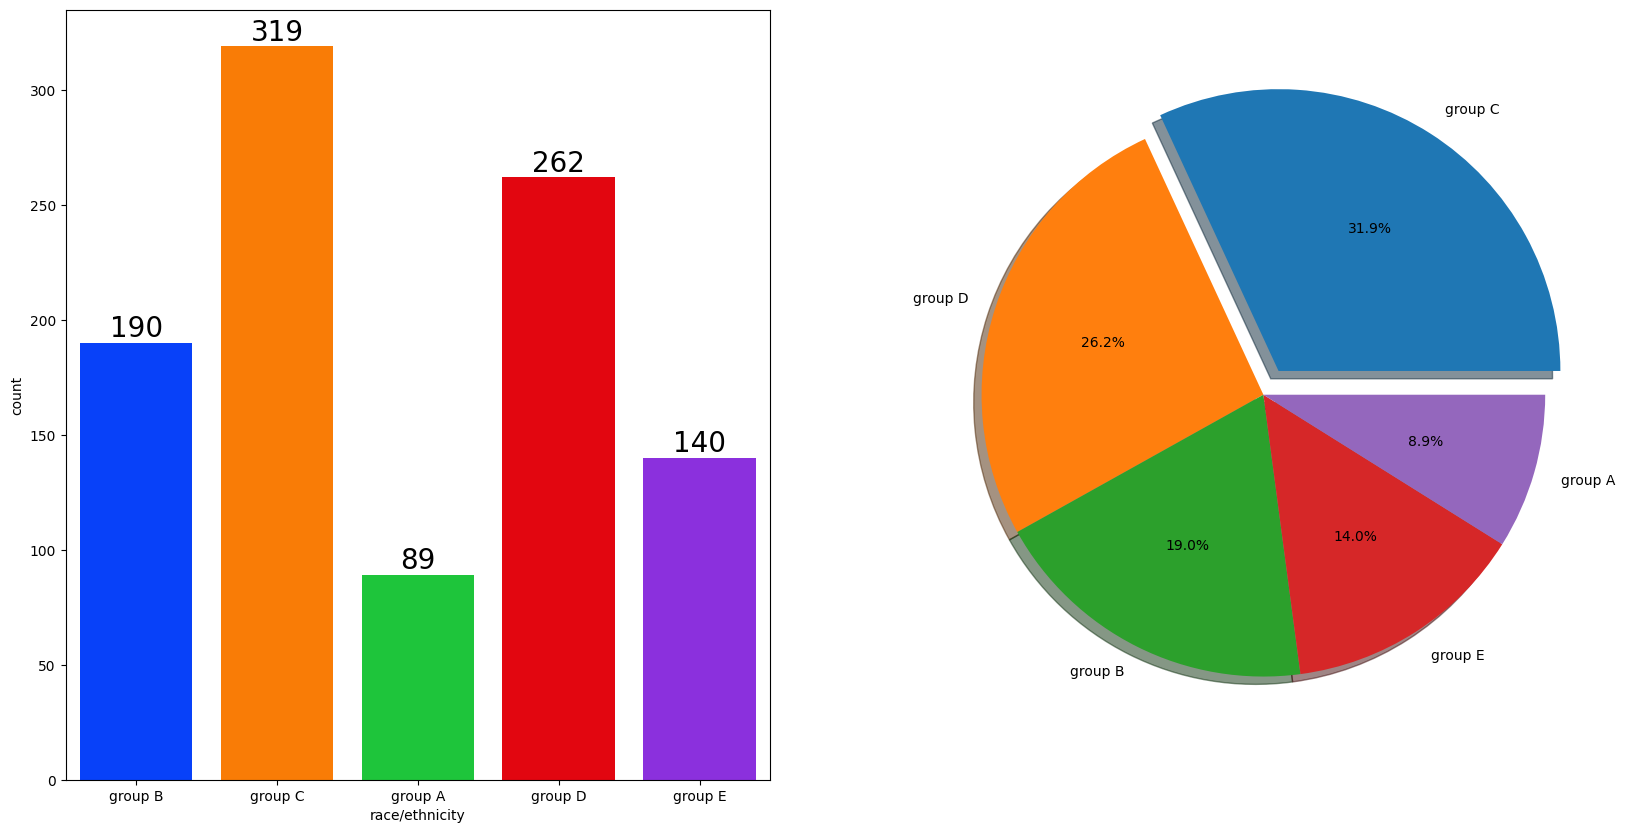

In [63]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

#### Insights 
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

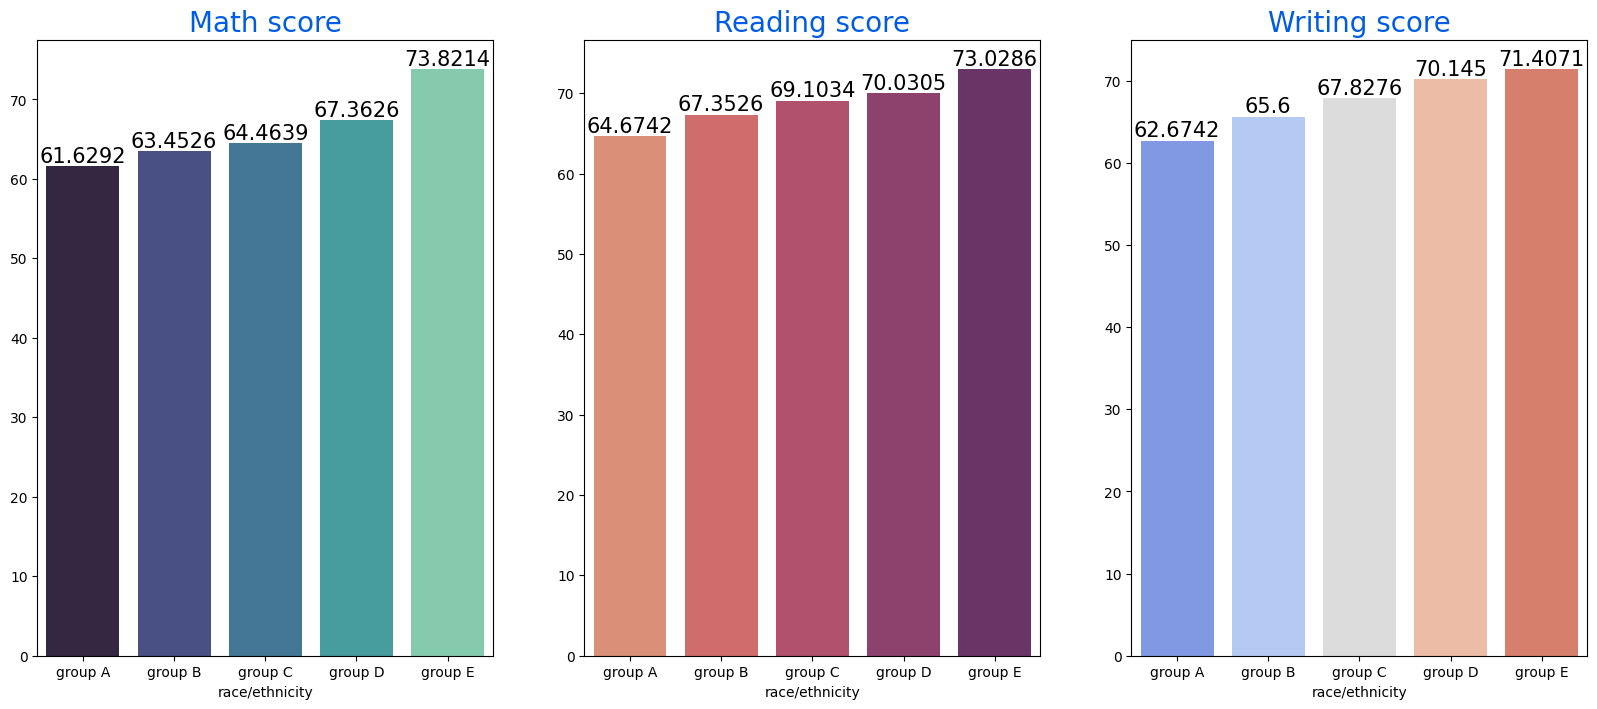

In [64]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights 
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 
- Students from a lower Socioeconomic status have a lower avg in all course subjects

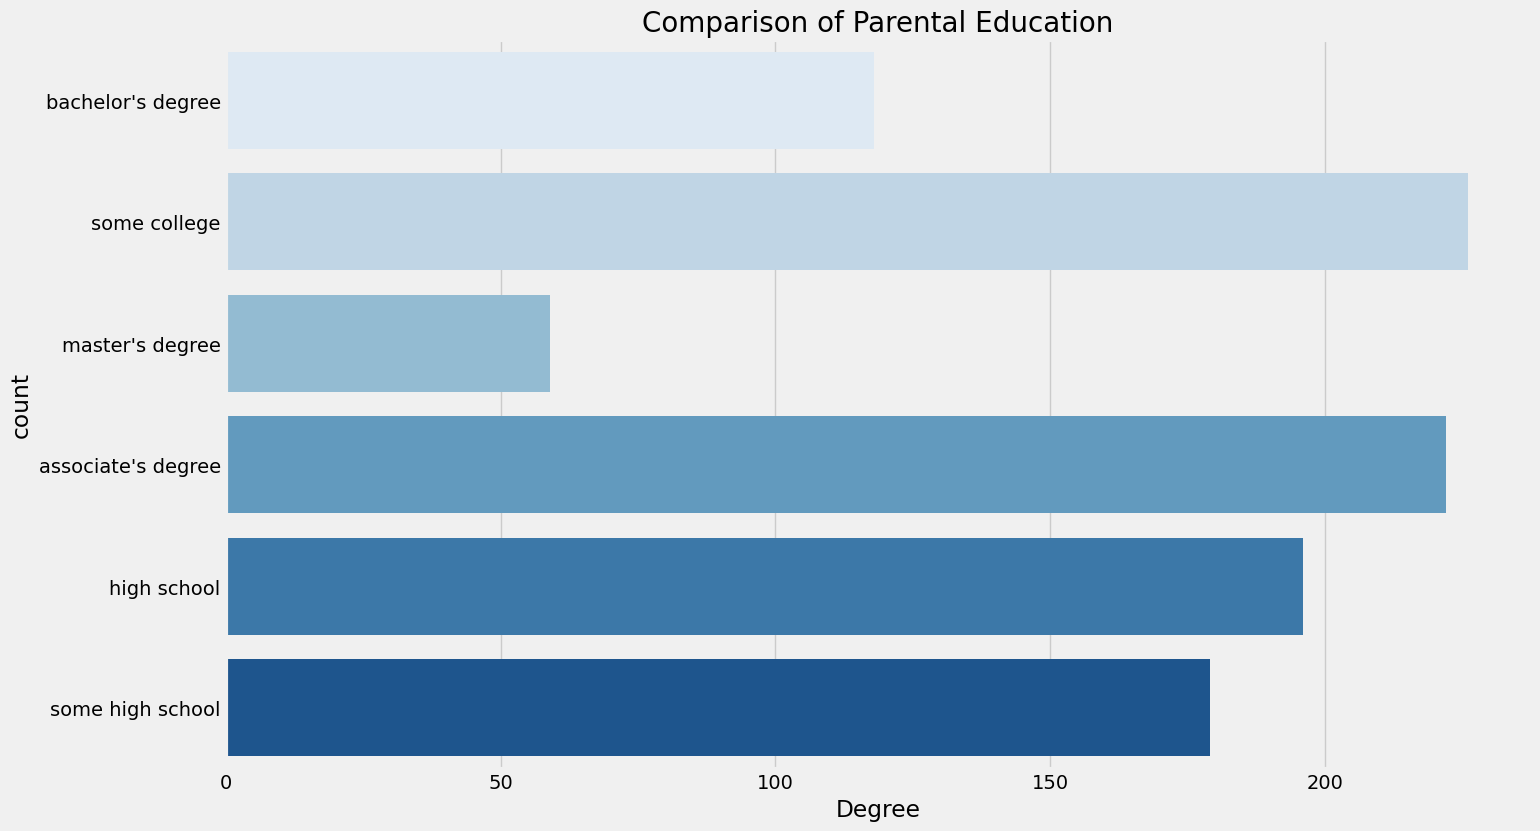

In [65]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

#### Insights 
- Largest number of parents are from some college.

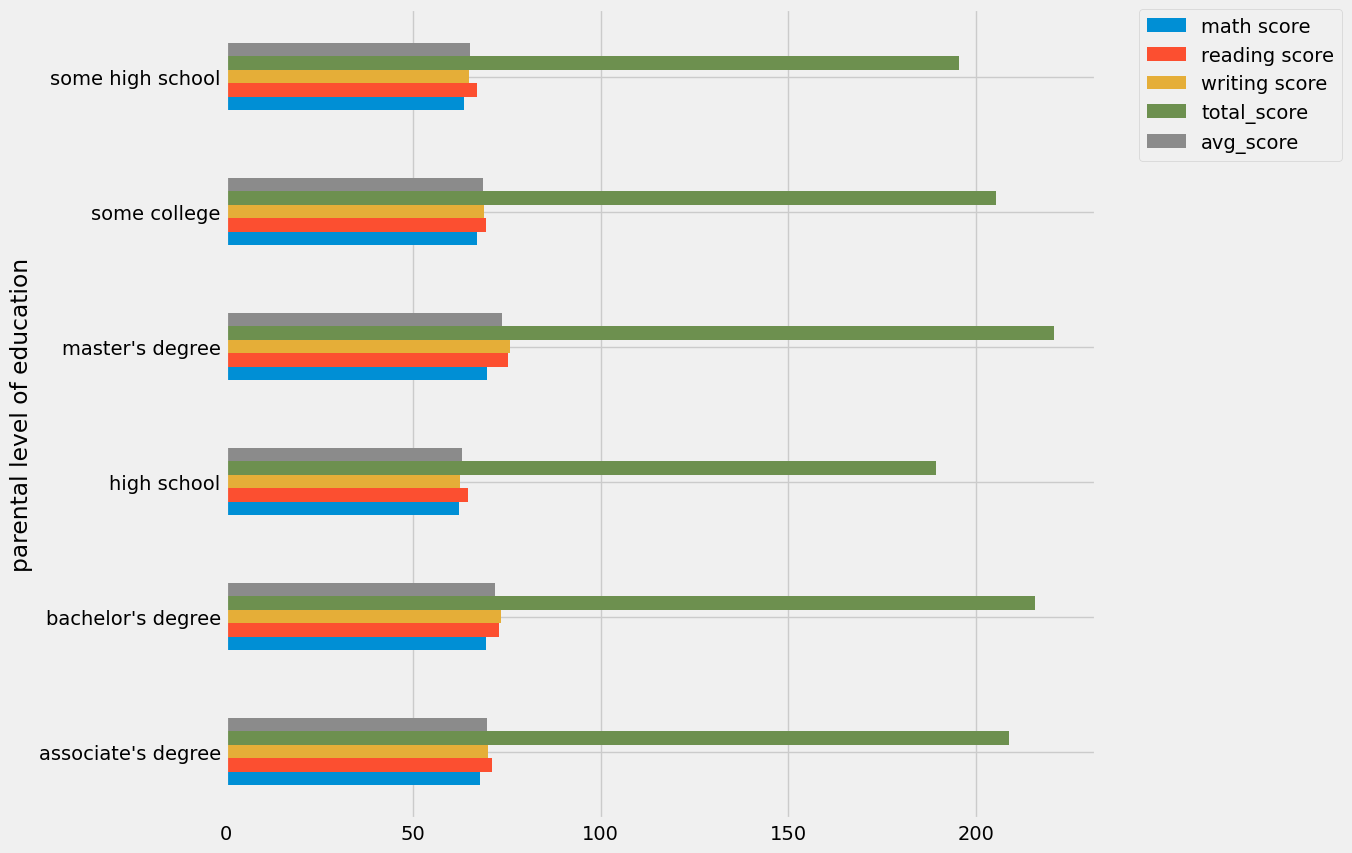

In [67]:
numeric_columns = df.select_dtypes(include='number')
grouped = numeric_columns.groupby(df['parental level of education']).mean()
grouped.plot(kind='barh', figsize=(10, 10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


#### Insights 
- The score of student whose parents possess master and bachelor level education are higher than others.

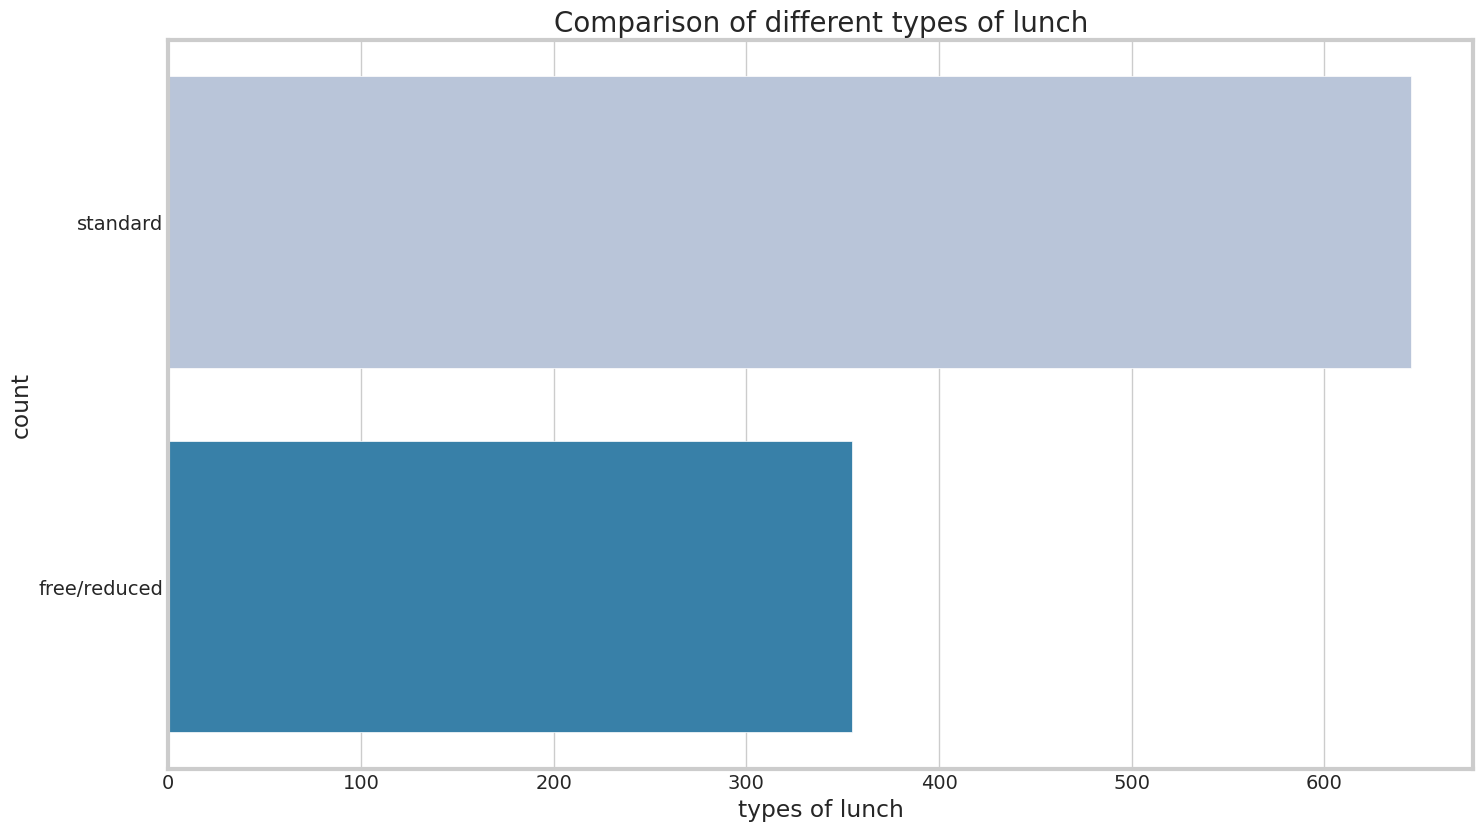

In [74]:
plt.rcParams['figure.figsize'] = (15, 9)
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

#### Insights 
- Students being served Standard lunch was more than free lunch

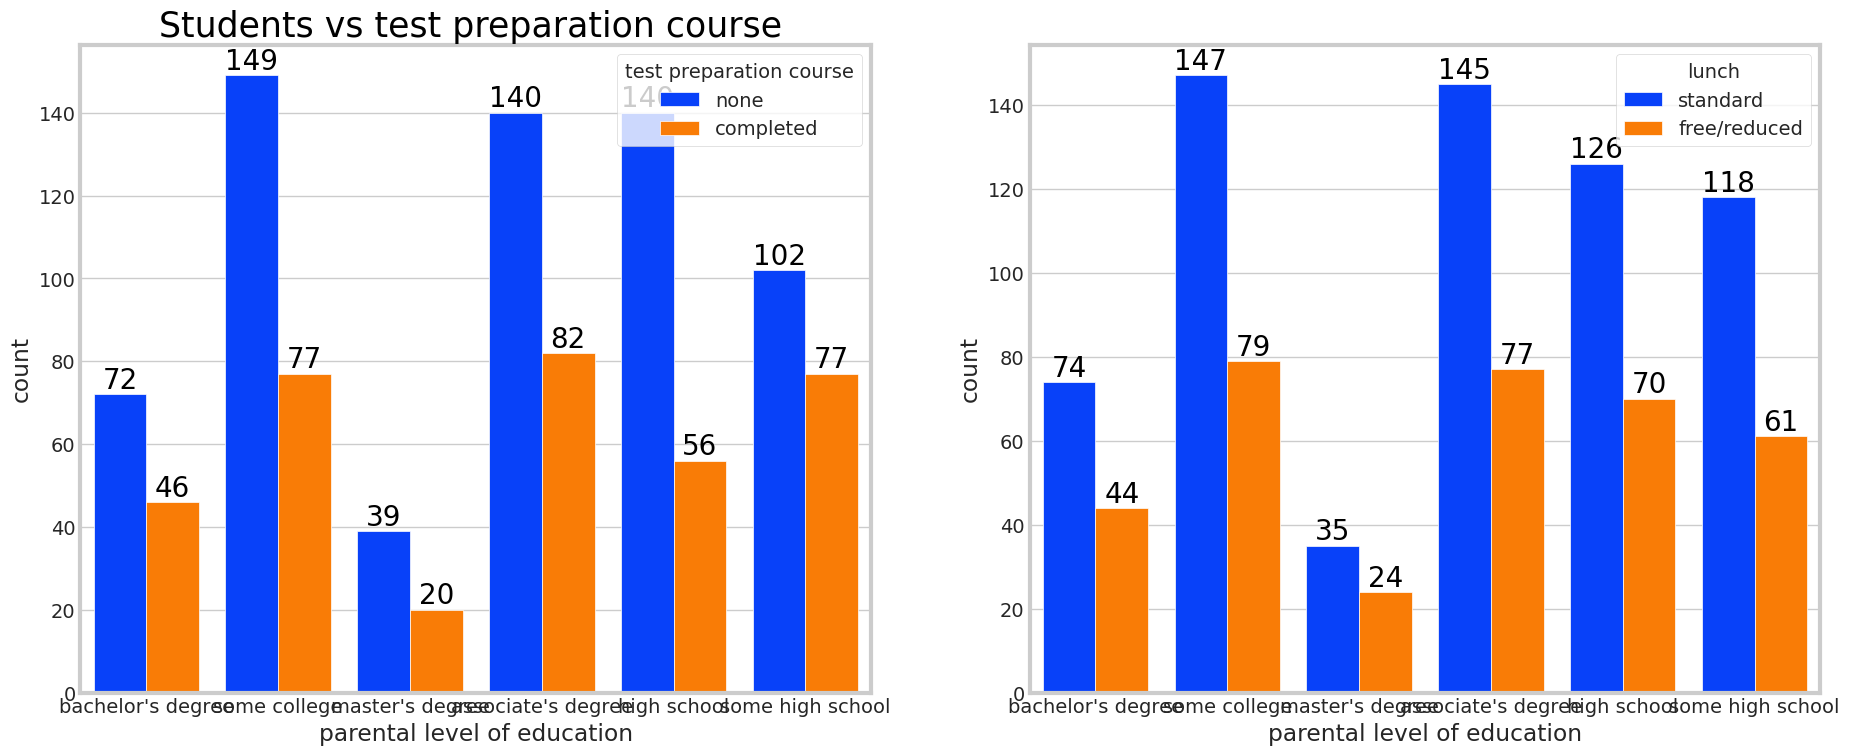

In [75]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

#### Insights 
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

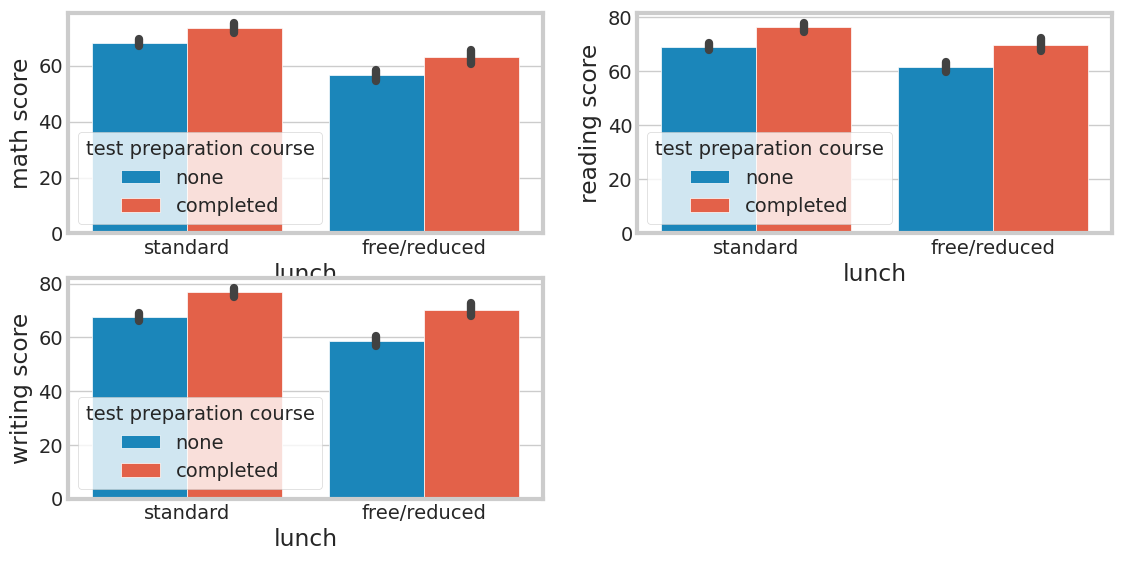

In [77]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])
plt.show()

#### Insights  
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

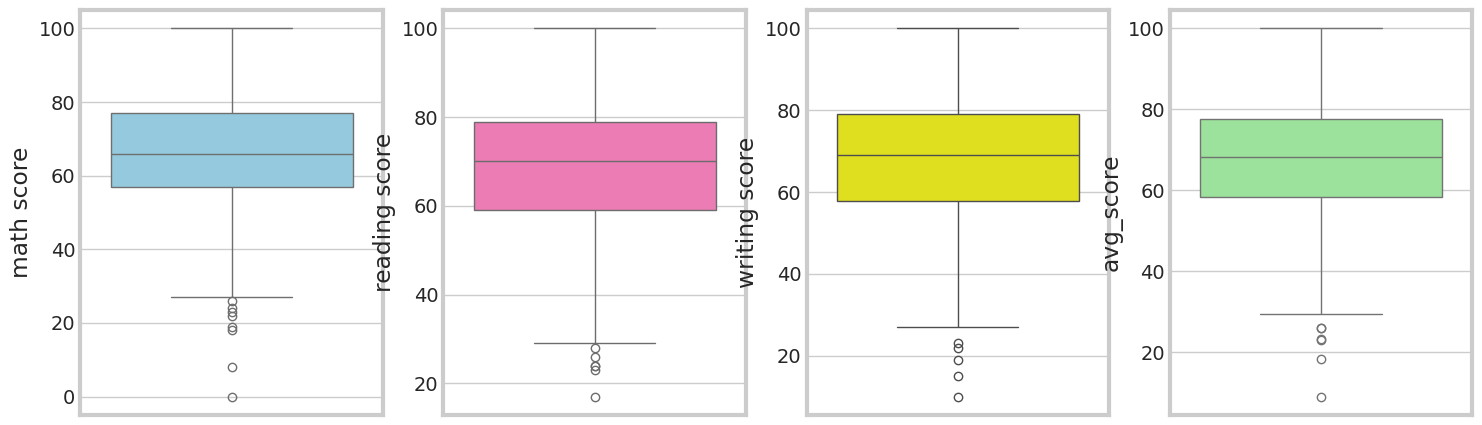

In [79]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['avg_score'],color='lightgreen')
plt.show()

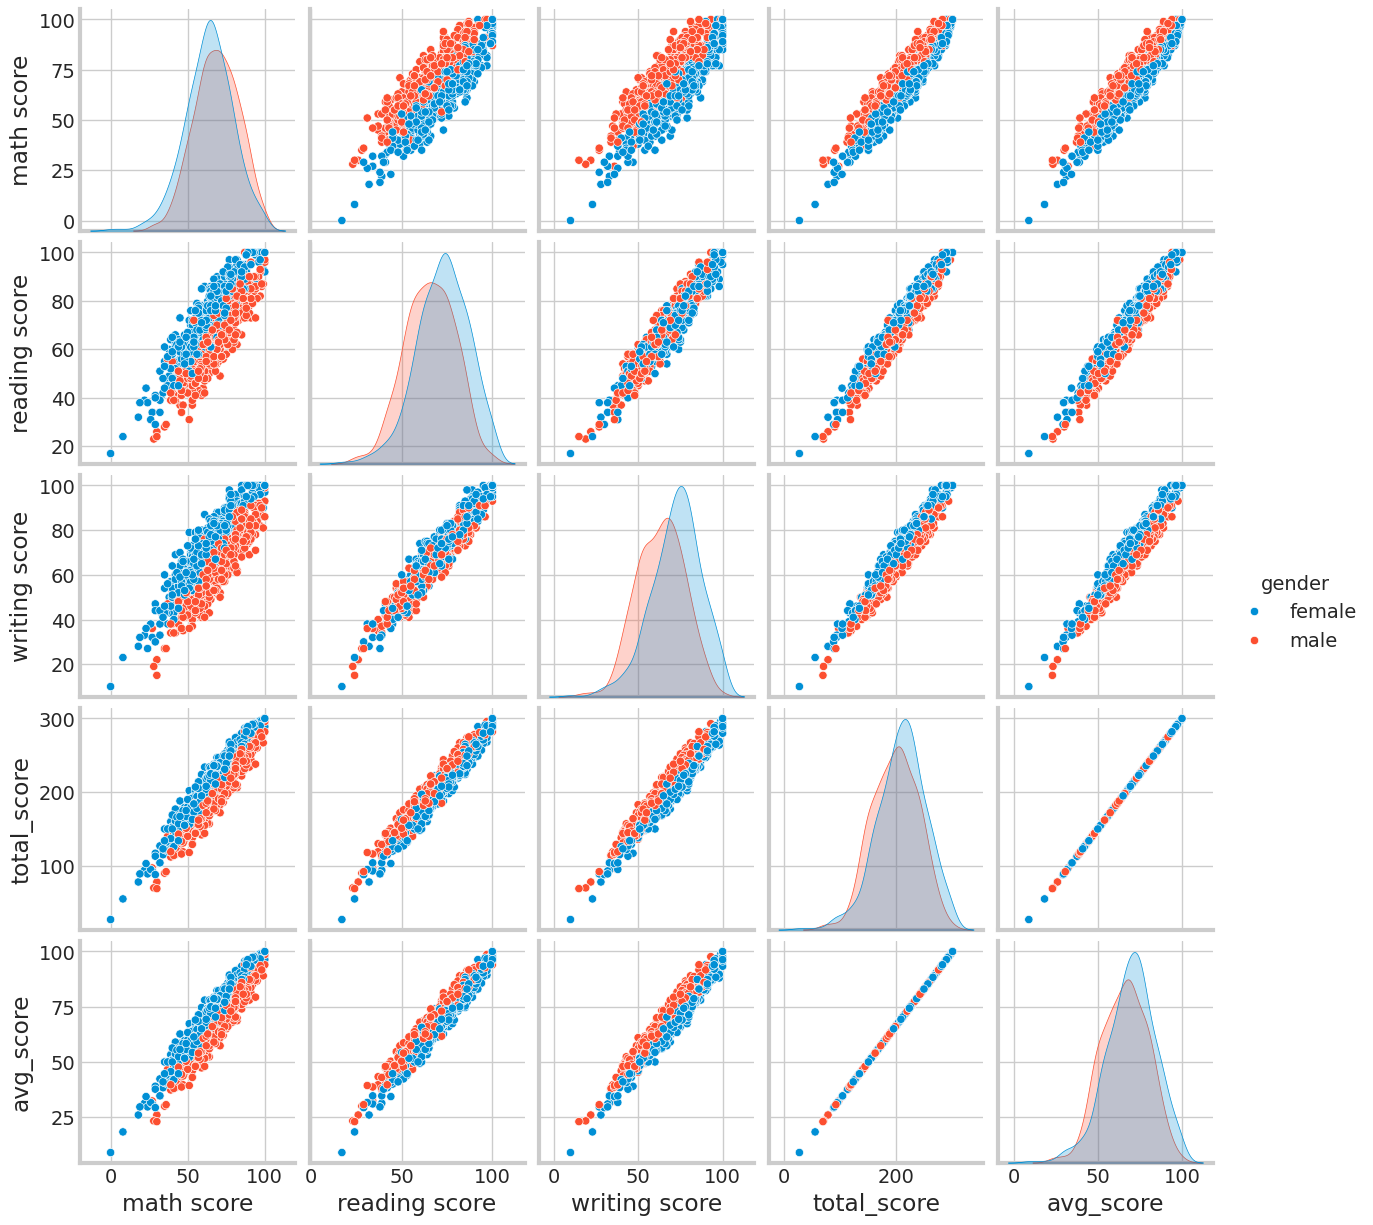

In [80]:
sns.pairplot(df,hue = 'gender')
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.